In [ ]:
from keras.datasets import mnist;
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train = train_images.reshape((60000,28,28,1))
x_test = test_images.reshape((10000,28,28,1))

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add( layers.Conv2D(32, (3,3), activation='relu',
input_shape=(28,28,1)) )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Flatten() )
model.add( layers.Dense(64,activation='relu') )
model.add( layers.Dense(10,activation='softmax') )

model.compile( optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'] )

In [ ]:
print( model.summary() )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
history = model.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 10s 11ms/step - loss: 0.3550 - accuracy: 0.8993 - val_loss: 0.1578 - val_accuracy: 0.9535
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.1197 - accuracy: 0.9653 - val_loss: 0.0873 - val_accuracy: 0.9761
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0753 - accuracy: 0.9789 - val_loss: 0.0671 - val_accuracy: 0.9794
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0561 - accuracy: 0.9840 - val_loss: 0.0583 - val_accuracy: 0.9811
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0464 - accuracy: 0.9865 - val_loss: 0.0600 - val_accuracy: 0.9806
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0388 - accuracy: 0.9887 - val_loss: 0.0452 - val_accuracy: 0.9845
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0320 - accuracy: 0.9907 - val_loss: 0.0446 - val_accuracy: 0.9855
E

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt

In [ ]:
predict_x_train = model.predict(x_train)
y_result_train = np.argmax(predict_x_train,axis=1)

predict_x_test = model.predict(x_test)
y_result_test = np.argmax(predict_x_test,axis=1)

train_err = np.sum(y_result_train != np.argmax(y_train, axis=1))
test_err = np.sum(y_result_test != np.argmax(y_test, axis=1))

print(f'Liczba blednie sklasyfikowanych probek dla zbioru treningowego: {train_err}')
print(f'Liczba blednie sklasyfikowanych probek dla zbioru testowego: {test_err}')

313/313 [==============================] - 1s 2ms/step
Liczba blednie sklasyfikowanych probek dla zbioru treningowego: 213
Liczba blednie sklasyfikowanych probek dla zbioru testowego: 139


In [ ]:
y_pred = model.predict(x_train)
y_pred_rounded = [np.argmax(pred) for pred in y_pred]

accuracy = accuracy_score(np.argmax(y_train, axis=1), y_pred_rounded)
precision = precision_score(np.argmax(y_train, axis=1),
y_pred_rounded, average='macro')
recall = recall_score(np.argmax(y_train, axis=1), y_pred_rounded,
average='macro')
conf_matrix = confusion_matrix(np.argmax(y_train, axis=1),
y_pred_rounded)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

1875/1875 [==============================] - 4s 2ms/step
Accuracy: 0.99645
Precision: 0.996452334930849
Recall: 0.996452334930849
Confusion Matrix:
 [[5911    0    3    1    2    0    6    0    0    0]
 [   0 6719    5    1    3    1    2    9    2    0]
 [   0    1 5946    0    0    0    0   10    1    0]
 [   1    0    5 6120    0    1    0    3    0    1]
 [   0    1    1    0 5835    0    1    1    0    3]
 [   1    0    2   11    0 5397    3    0    3    4]
 [   0    1    0    0    1    1 5913    0    2    0]
 [   0    2    3    0    0    0    0 6258    1    1]
 [   2    1   13    3    8    2    2    4 5809    7]
 [   4    1    2    1   39    3    0   15    5 5879]]


In [ ]:
y_pred = model.predict(x_test)
y_pred_rounded = [np.argmax(pred) for pred in y_pred]

accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_rounded)
precision = precision_score(np.argmax(y_test, axis=1), y_pred_rounded, average='macro')
recall = recall_score(np.argmax(y_test, axis=1), y_pred_rounded, average='macro')
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_rounded)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9861
Precision: 0.9861841189152937
Recall: 0.9861841189152937
Confusion Matrix:
 [[ 972    0    2    0    0    1    3    1    1    0]
 [   0 1124    5    0    1    0    2    2    1    0]
 [   1    2 1018    1    1    0    2    6    1    0]
 [   0    0    4  999    0    2    0    3    2    0]
 [   0    0    0    0  980    0    1    0    0    1]
 [   1    0    0    7    0  883    1    0    0    0]
 [   6    2    1    1    1    2  945    0    0    0]
 [   0    0    8    1    0    0    0 1018    1    0]
 [   5    0    5    3    3    2    1    5  945    5]
 [   1    2    1    5   15    2    0    6    0  977]]


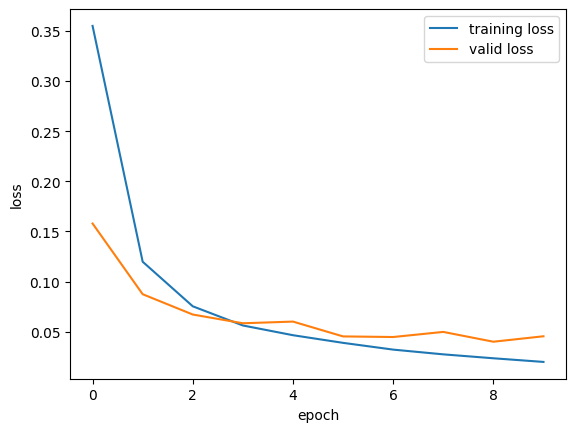

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

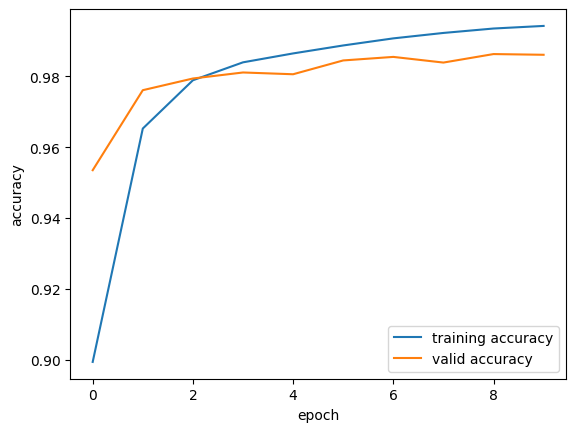

In [ ]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='valid accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

7/7 [==============================] - 0s 10ms/step


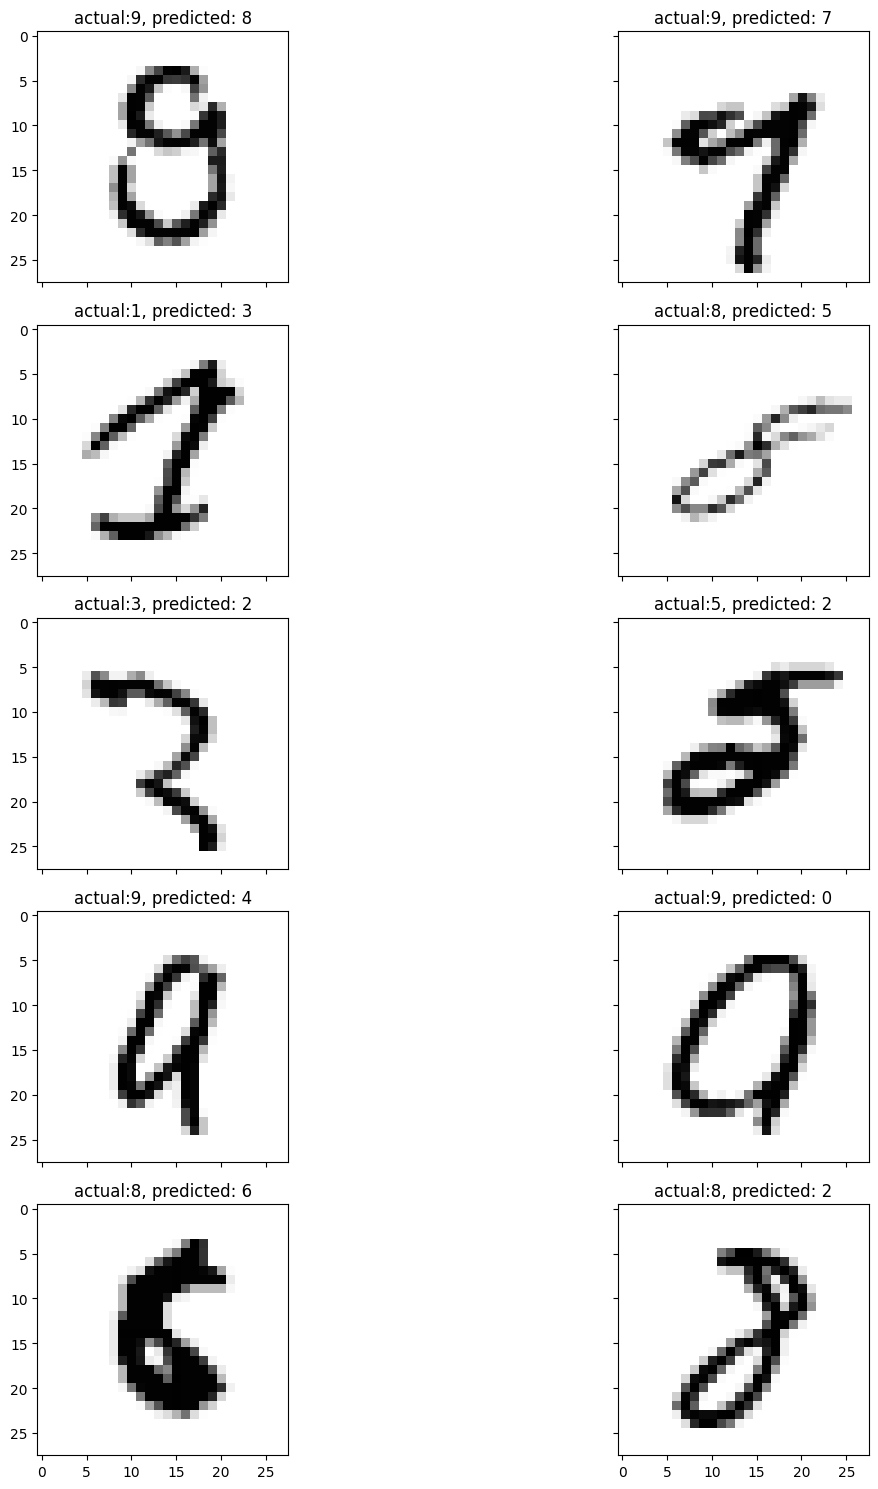

In [ ]:
badClassified = y_result_train != np.argmax(y_train, axis=1)
badClassified_labels = np.argmax(y_train[badClassified], axis=1)
badClassified = x_train[badClassified]
badClassified_predicted = np.argmax(model.predict(badClassified), axis=1)

fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(15,15))
ax = ax.flatten()

for i in range(10):
    img = badClassified[i].reshape(28,28)
    ax[i].imshow( img, cmap='Greys')
    ax[i].set_title(f'actual:{badClassified_labels[i]}, predicted: {badClassified_predicted[i]}')
plt.tight_layout()
plt.show()

In [ ]:
#Siec z dodatkowa warstwa konwolucujna

model2 = models.Sequential()
model2.add( layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)) )
model2.add( layers.MaxPooling2D((2,2)) )
model2.add( layers.Conv2D(64, (3,3), activation='relu') )
model2.add( layers.MaxPooling2D((2,2)) )
model2.add( layers.Flatten() )
model2.add( layers.Dense(64,activation='relu') )
model2.add( layers.Dense(10,activation='softmax') )

model2.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

history = model2.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
235/235 [==============================] - 4s 9ms/step - loss: 0.3075 - accuracy: 0.9153 - val_loss: 0.0791 - val_accuracy: 0.9768
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0763 - accuracy: 0.9773 - val_loss: 0.0491 - val_accuracy: 0.9843
Epoch 3/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0536 - accuracy: 0.9837 - val_loss: 0.0506 - val_accuracy: 0.9845
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.0371 - val_accuracy: 0.9883
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0338 - accuracy: 0.9897 - val_loss: 0.0359 - val_accuracy: 0.9890
Epoch 6/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0315 - accuracy: 0.9901 - val_loss: 0.0372 - val_accuracy: 0.9874
Epoch 7/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.0331 - val_accuracy: 0.9893
Epoch 

In [ ]:
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
predict_x_train = model2.predict(x_train)
y_result_train = np.argmax(predict_x_train,axis=1)

predict_x_test = model2.predict(x_test)
y_result_test = np.argmax(predict_x_test,axis=1)

train_err = np.sum(y_result_train != np.argmax(y_train, axis=1))
test_err = np.sum(y_result_test != np.argmax(y_test, axis=1))

print(f'Liczba blednie sklasyfikowanych probek dla zbioru treningowego: {train_err}')
print(f'Liczba blednie sklasyfikowanych probek dla zbioru testowego: {test_err}')

313/313 [==============================] - 1s 2ms/step
Liczba blednie sklasyfikowanych probek dla zbioru treningowego: 253
Liczba blednie sklasyfikowanych probek dla zbioru testowego: 97


In [ ]:
y_pred = model2.predict(x_train)
y_pred_rounded = [np.argmax(pred) for pred in y_pred]

accuracy = accuracy_score(np.argmax(y_train, axis=1), y_pred_rounded)
precision = precision_score(np.argmax(y_train, axis=1),
y_pred_rounded, average='macro')
recall = recall_score(np.argmax(y_train, axis=1), y_pred_rounded,
average='macro')
conf_matrix = confusion_matrix(np.argmax(y_train, axis=1),
y_pred_rounded)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

1875/1875 [==============================] - 4s 2ms/step
Accuracy: 0.9957833333333334
Precision: 0.995790040004587
Recall: 0.995790040004587
Confusion Matrix:
 [[5898    0    3    1    0    0    0    0   17    4]
 [   0 6708    4    4    1    1    2   17    4    1]
 [   0    1 5951    0    0    0    0    2    4    0]
 [   0    0    6 6116    0    1    0    3    4    1]
 [   0    1    1    0 5818    0    2    3    2   15]
 [   3    0    1   32    0 5358    0    2   13   12]
 [  10    0    2    1    3    5 5879    0   18    0]
 [   0    2    5    1    1    0    0 6245    2    9]
 [   0    1    0    1    0    0    1    1 5840    7]
 [   0    2    1    2    6    0    0    2    2 5934]]


In [ ]:
y_pred = model2.predict(x_test)
y_pred_rounded = [np.argmax(pred) for pred in y_pred]

accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_rounded)
precision = precision_score(np.argmax(y_test, axis=1), y_pred_rounded, average='macro')
recall = recall_score(np.argmax(y_test, axis=1), y_pred_rounded, average='macro')
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_rounded)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9903
Precision: 0.9903692148778351
Recall: 0.9903692148778351
Confusion Matrix:
 [[ 975    0    1    0    0    0    0    0    3    1]
 [   0 1127    2    2    0    0    2    1    1    0]
 [   1    0 1026    0    1    0    0    3    1    0]
 [   0    0    3 1002    0    0    0    1    4    0]
 [   0    0    0    0  975    0    0    0    1    6]
 [   1    0    1   14    0  871    1    0    1    3]
 [   4    2    0    1    1    1  943    0    6    0]
 [   0    0    4    2    0    0    0 1020    0    2]
 [   1    0    1    2    0    0    0    2  966    2]
 [   0    1    0    2    2    2    0    3    1  998]]


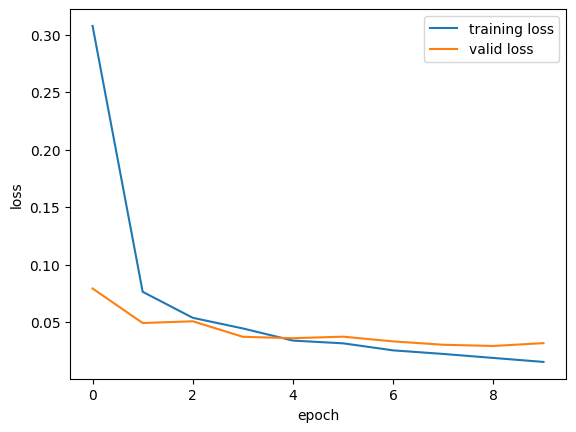

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

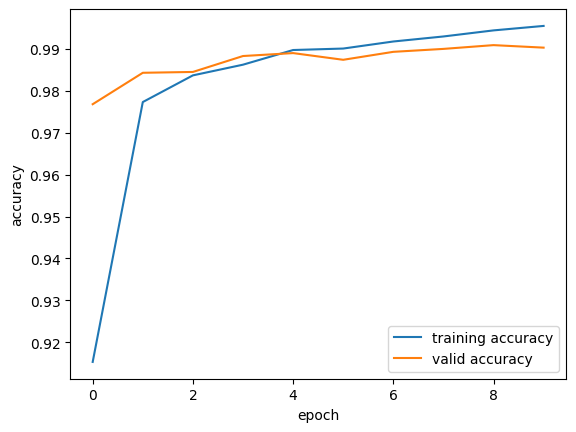

In [ ]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='valid accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

8/8 [==============================] - 0s 16ms/step


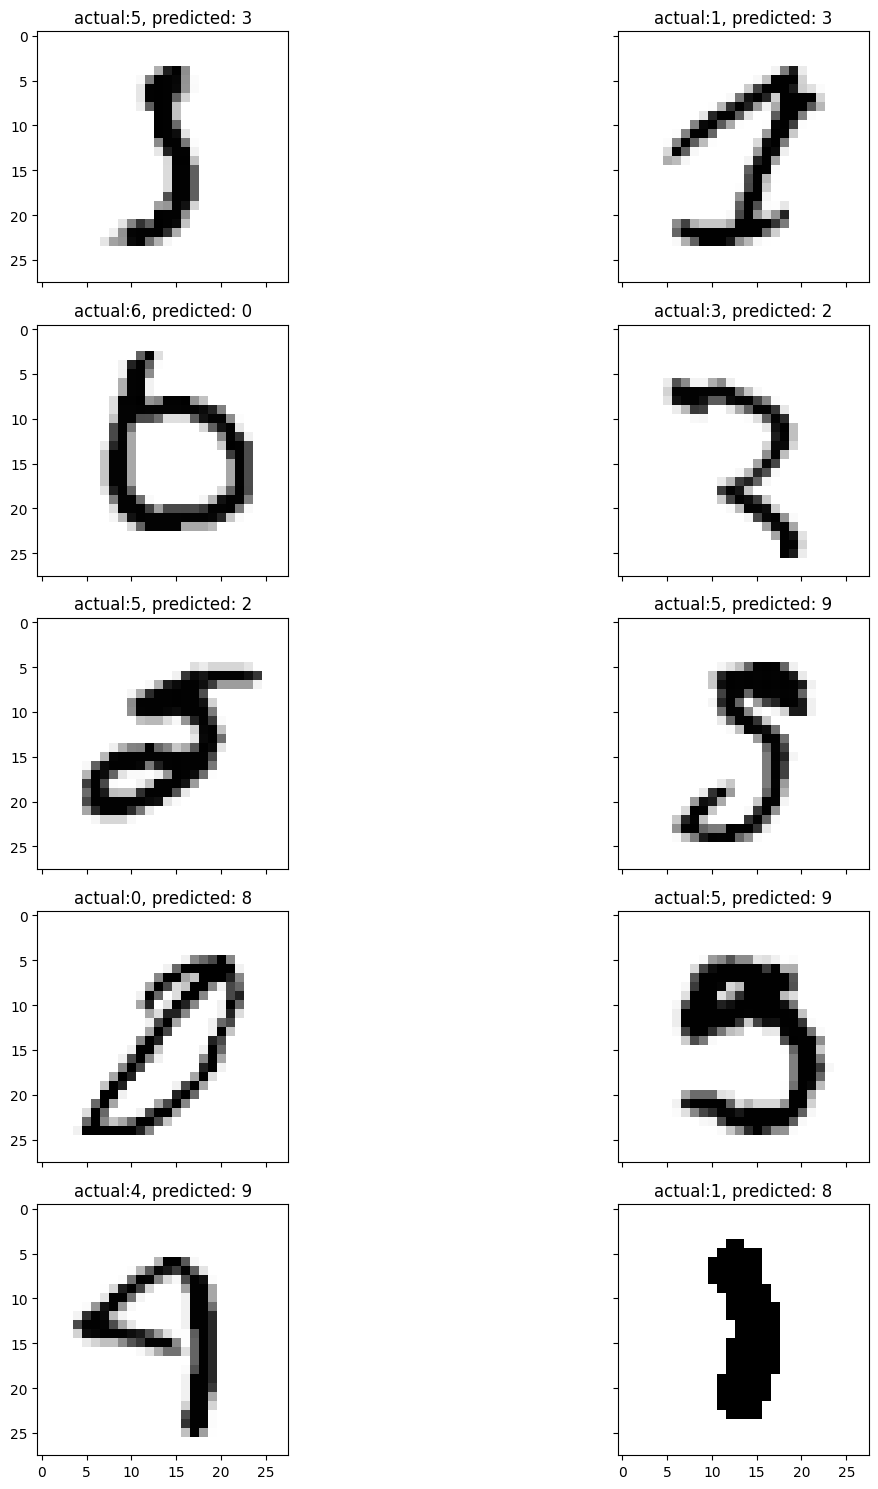

In [ ]:
badClassified = y_result_train != np.argmax(y_train, axis=1)
badClassified_labels = np.argmax(y_train[badClassified], axis=1)
badClassified = x_train[badClassified]
badClassified_predicted = np.argmax(model2.predict(badClassified), axis=1)

fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(15,15))
ax = ax.flatten()

for i in range(10):
    img = badClassified[i].reshape(28,28)
    ax[i].imshow( img, cmap='Greys')
    ax[i].set_title(f'actual:{badClassified_labels[i]}, predicted: {badClassified_predicted[i]}')
plt.tight_layout()
plt.show()

In [ ]:
import cv2
import os

In [ ]:
imgs = os.listdir(r'/content/Images')

In [ ]:
#imgs = imgs[:-1]
imgs

['4.png',
 '0.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png',
 '3.png',
 '2.png',
 '1.png',
 '5.png']

In [ ]:
digits = []
for img in imgs:
    dig = cv2.imread(r'/content/Images/'+img, cv2.IMREAD_GRAYSCALE)
    # print(type(dig))
    dig = cv2.resize(dig, (28,28))
    dig = dig/255
    dig = np.abs(dig-1)
    # print(dig)
    digits.append(dig)

In [ ]:
type(digits[0]), digits[0].shape

In [ ]:
imgs[0].split('.')[0]

In [ ]:
predicted = np.argmax(model.predict(digits[0].reshape(1, 28, 28, 1)), axis=1)[0]

In [ ]:
fig, ax = plt.subplots(nrows=int(len(digits)/2), ncols=2, sharex=True, sharey=True, figsize=(20,20))
ax = ax.flatten()

for i in range(len(digits)):
    actual = imgs[i].split('.')[0]
    predicted = np.argmax(model2.predict(digits[i].reshape(1, 28, 28, 1)), axis=1)[0]
    ax[i].imshow(digits[i].reshape((28,28)),cmap='Greys')
    ax[i].set_title(f'actual:{actual}, predicted: {predicted}')
# plt.tight_layout()
plt.show()